# K-means clustering

## import library

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [31]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')
print(feature)

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))


[[-2.78158782  6.13851704]
 [-5.79072687  3.00770345]
 [-8.85288476  3.99889271]
 ...
 [ 8.01075285  9.06955099]
 [ 1.12859575 -2.53389057]
 [ 0.03723381  8.87194034]]
number of data : 1000
number of feature : 2


## plot the input data

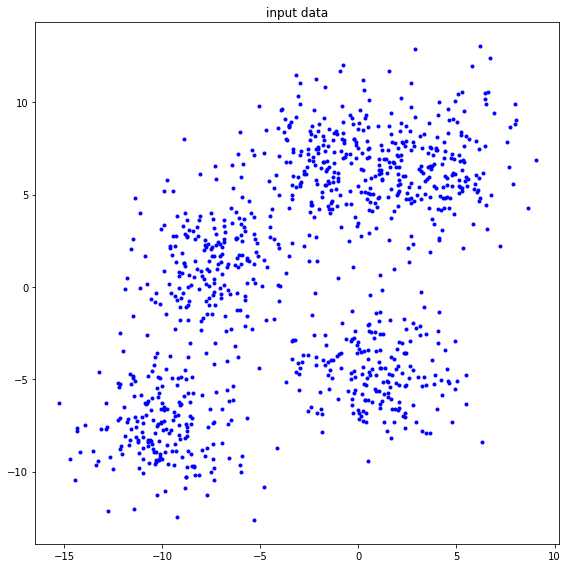

In [107]:
# ===================================================
# fill up the blank for plotting the data

plot_data(feature)

# ===================================================

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [58]:
def compute_distance(feature, center):
    # ===================================================
    # fill up the function body
    distance = np.zeros(shape=(number_data))
    
    for i in range(number_data):
        distance[i] = (sum((feature[i] - center)**2))**0.5
    
    # ===================================================
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [88]:

def compute_centroid(feature, label_feature, value_label):
    # ===================================================
    # fill up the function body
    # 주어진 value_label 과 같은 label을 가진 feature만 label_array 에 넣어서 centroid 계산!!
    centroid = np.zeros(shape=(number_feature))
    temp = []
    for i in range(number_data):
        if label_feature[i] == value_label:
            temp.append(feature[i])
    
    label_array = np.array(temp)
    centroid = np.mean(label_array, axis=0)  # compute centroid of value_label
    
    # ===================================================
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [89]:
def compute_label(distance):
    # ===================================================
    # fill up the function body
    
    index_label_feature = np.zeros(shape=(number_data))
    
    # np.argmin(): 최소값의 Index 반환!
    index_label_feature = np.argmin(distance, axis=1)

    # ===================================================
    return index_label_feature


In [90]:
def compute_loss(feature, label_feature, centroid):
    
    loss = 0
    
    for k in range(len(centroid)):
        center = centroid[k]
        temp = 0  # cluster label이 k의 loss 합
        for i in range(number_data):
            if label_feature[i] == k:  # i번 째 feature label이 k(cluster label)과 같으면 해당 center와 loss 계산
                temp += sum((feature[i] - center)**2)
        
        loss += temp
    loss = (1/number_data)*loss
    
    return loss

In [251]:

# fruits = np.array([['apple', 'banana', 'cherries'], ['durian', 'grapes', 'lemon']]).reshape(-1)
# # p = [0.1, 0, 0.2, 0.5, 0.1, 0.05, 0.05]
# print(np.random.choice(fruits, 3, replace=False))


# ===================================================
# assign the number of clusters and iterations

max_iter = 1000
# number_cluster      = 5
number_cluster      = 10

number_iteration    = max_iter

# ===================================================

In [252]:
distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))
loss_iteration      = np.zeros(shape=(number_iteration, 1))
centroid_iteration  = np.zeros(shape=(number_iteration, number_cluster, number_feature))


# Initialization
rand_array = np.random.randint(number_data, size=(number_cluster))
for i in range(len(rand_array)):
    centroid[i] = feature[rand_array[i]]


for i in range(number_iteration):  # 10000

    for k in range(number_cluster):  # k
        # ===================================================
        # fill up the blank
        
        distance[:, k] = compute_distance(feature, center=centroid[k])
        label_feature = compute_label(distance)  # reshape?
        centroid[k, :] = compute_centroid(feature, label_feature, k)
        
        # ===================================================
    # ===================================================
    # fill up the blank

    centroid_iteration[i] = centroid
    loss_iteration[i] = compute_loss(feature, label_feature, centroid)
    

        
    
    # ===================================================

In [254]:
for i in range(number_iteration):
    print("{}: {}".format(i, loss_iteration[i]))




0: [9.20998839]
1: [6.36313448]
2: [5.83562861]
3: [5.44805193]
4: [5.26039889]
5: [5.12625596]
6: [5.04456448]
7: [5.01591792]
8: [4.98844225]
9: [4.95795765]
10: [4.94127515]
11: [4.92779868]
12: [4.91102555]
13: [4.87831741]
14: [4.85489523]
15: [4.83843385]
16: [4.81860926]
17: [4.80344407]
18: [4.79717215]
19: [4.78640459]
20: [4.77710766]
21: [4.76243199]
22: [4.75436988]
23: [4.75286874]
24: [4.7497871]
25: [4.74743048]
26: [4.74603599]
27: [4.743675]
28: [4.7389285]
29: [4.73640525]
30: [4.73475398]
31: [4.73435442]
32: [4.73348311]
33: [4.73313224]
34: [4.73260864]
35: [4.73238568]
36: [4.73199754]
37: [4.73190604]
38: [4.7318686]
39: [4.7318686]
40: [4.7318686]
41: [4.7318686]
42: [4.7318686]
43: [4.7318686]
44: [4.7318686]
45: [4.7318686]
46: [4.7318686]
47: [4.7318686]
48: [4.7318686]
49: [4.7318686]
50: [4.7318686]
51: [4.7318686]
52: [4.7318686]
53: [4.7318686]
54: [4.7318686]
55: [4.7318686]
56: [4.7318686]
57: [4.7318686]
58: [4.7318686]
59: [4.7318686]
60: [4.7318686]


## plot the results

In [255]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    # ===================================================
    # fill up the blank
    plt.plot(x, y, '.', color = 'blue')

    # ===================================================
    plt.tight_layout()
    plt.show()

In [256]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    # ===================================================
    # fill up the blank
   
    plt.plot(loss_iteration, '-', color='red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    
    # ===================================================
    plt.tight_layout()
    plt.show()

In [257]:

def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    # ===================================================
    # fill up the blank
    if number_cluster == 5:
        colors = ["firebrick", "gold", "darkorange", "limegreen", "cornflowerblue"]
    elif number_cluster == 10:
        colors = ["firebrick", "gold", "darkorange", "limegreen", "cornflowerblue", "darkcyan", "purple", "deeppink", "sienna", "darkgrey"]
        
    # initial
    plt.plot(centroid_iteration[0, :, 0], centroid_iteration[0, :, 1], 'o', color='blue', label='initial')
    # final
    plt.plot(centroid_iteration[number_iteration-1, :, 0], centroid_iteration[number_iteration-1, :, 1], 's', color='red', label='final')

    # 
    for k, c in zip(range(number_cluster), colors):
        plt.plot(centroid_iteration[:, k, 0], centroid_iteration[:, k, 1], '-', color=c, label='cluster='+str(k))

    plt.xlabel('iteration')
    plt.legend(loc='right')
    
    # ===================================================
    plt.tight_layout()
    plt.show()

In [258]:
def plot_cluster(feature, label_feature, number_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    # ===================================================
    # fill up the blank
            
    plt.scatter(feature[:, 0], feature[:, 1], c=label_feature, s=20,cmap=plt.cm.get_cmap('rainbow', number_cluster))
    plt.colorbar(ticks=range(number_cluster), label='Cluster')

    # ===================================================
    plt.tight_layout()
    plt.show()




***

# results

***

1. plot the input data

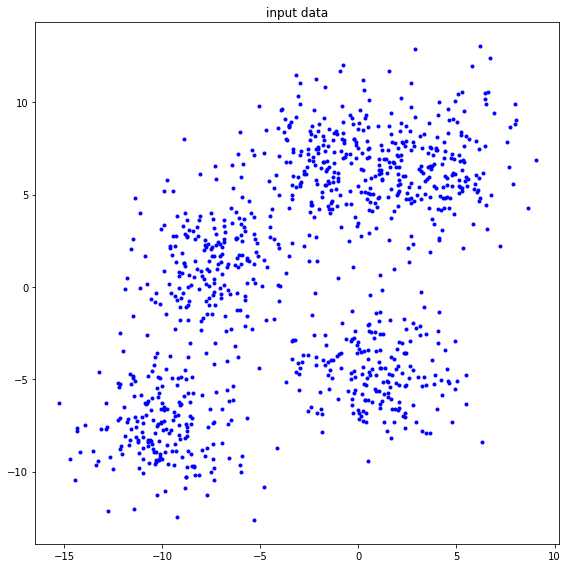

In [243]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

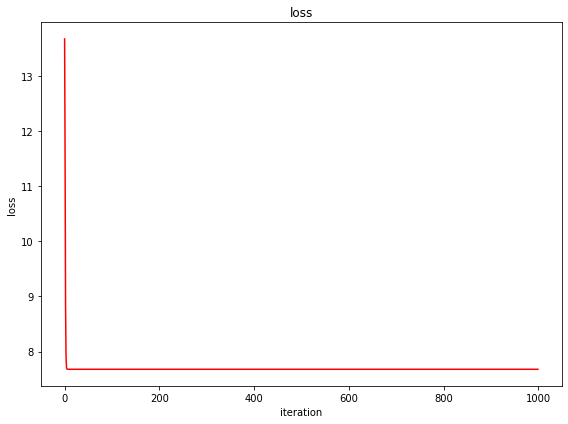

In [244]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

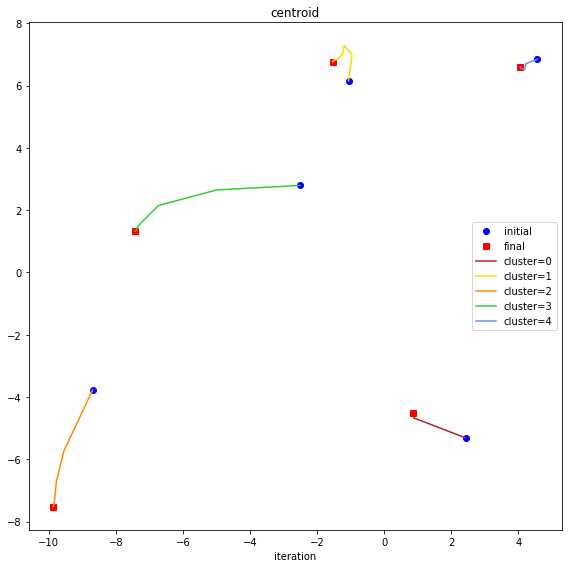

In [245]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

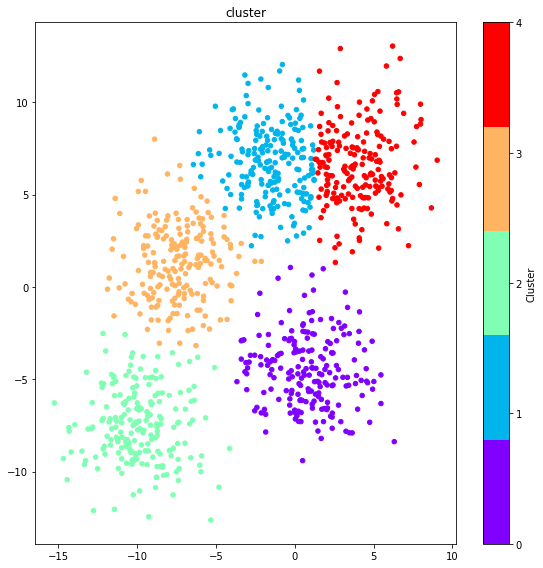

In [250]:
plot_cluster(feature, label_feature, number_cluster)

***

5. plot the loss over the iterations with the number of clusters being 10

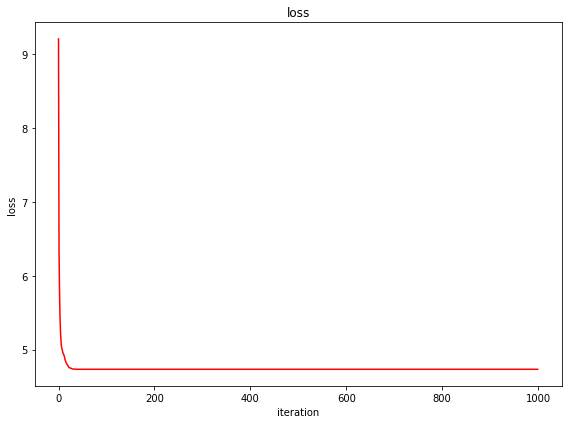

In [259]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

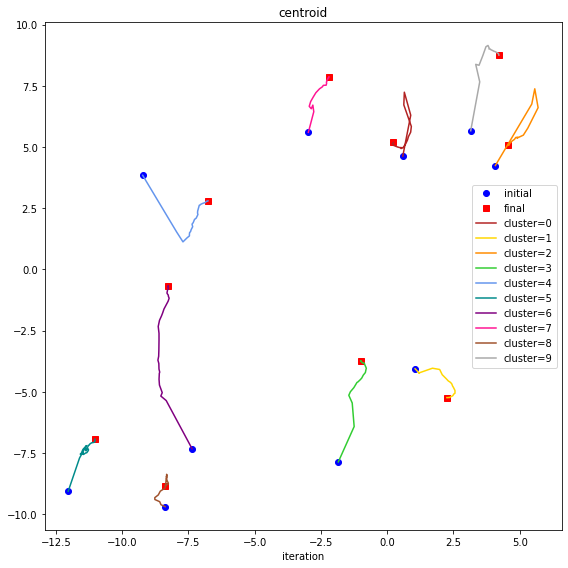

In [260]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

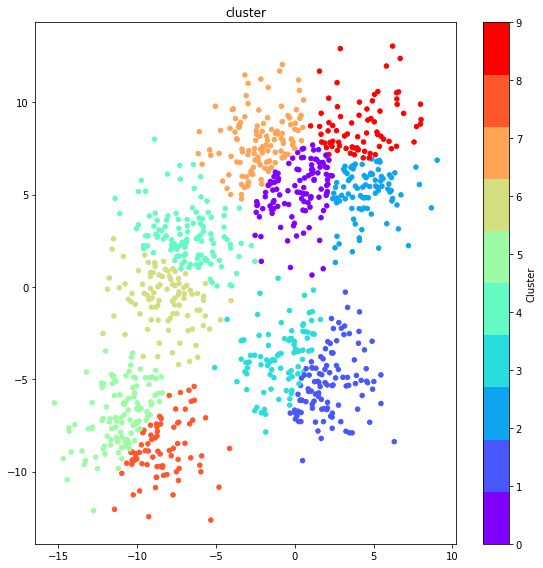

In [261]:
plot_cluster(feature, label_feature, number_cluster)

***